In [1]:
import numpy as np
import qutip as qt

In [2]:
# Determine wheather evesdropping will take place
eavesdropper_present = False

In [3]:
# Define converting functions
def message_to_binary_str(message):
    return ''.join(format(ord(i), '08b') for i in message)

def binary_str_to_message(bin_str):
    char_list = []
    for i in range(0, len(bin_str), 8):
        ch = chr(int(bin_str[i:i+8], 2))
        char_list.append(ch)
        
    return ''.join(char_list)    

In [4]:
# Ask for message input

is_ascii = False

while not is_ascii:
    message = str(input("Enter message to be encrypted (all characters must be ASCII): "))
    is_ascii = all(ord(c) < 128 for c in message)  # check if message is in ASCII

binary_message =  message_to_binary_str(message)

Enter message to be encrypted (all characters must be ASCII): hey


In [5]:
# Determine message length and the lenth of the random sequances
n = len(binary_message)
m = 6*n

In [6]:
# 1) Preparation phase

#  Define the constants that Bob and Alice agree on in the preparation phase
RECTILINEAR_BASIS = 0
DIAGONAL_BASIS = 1

# In rectilinear basis
HORIZONTAL_POL = 0
VERTICAL_POL = 1

# In diagonal basis
DIAGONAL_45_POL = 0
DIAGONAL_135_POL = 1

In [7]:
# Generate Alice's and Bob's random bases sequences of size m
alice_rand_bases_seq = np.random.choice([RECTILINEAR_BASIS, DIAGONAL_BASIS], size=m)
bob_rand_bases_seq = np.random.choice([RECTILINEAR_BASIS, DIAGONAL_BASIS], size=m)

# Generate Alice's random bit sequence of size m
alice_rand_bit_seq = np.random.choice([0, 1], size=m).tolist()

if eavesdropper_present:
    # Generate Eve's random bases sequence of size m
    eve_rand_bases_seq = np.random.choice([RECTILINEAR_BASIS, DIAGONAL_BASIS], size=m)
            

In [8]:
alice_rand_bases_seq

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1])

In [9]:
bob_rand_bases_seq

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1])

In [10]:
np.array(alice_rand_bit_seq)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0])

In [11]:
# Describe bases of Hilbert vector space
basis_0 = qt.basis(2,0)
basis_1 = qt.basis(2,1)

# Describe polarization states in Hilbert vector space
photon_h = basis_0                            # horizontally polarized photon
photon_v = basis_1                            # vertically polarized photon
photon_d45 = (basis_0 + basis_1).unit()       # diagonally polarized photon (45 deg)
photon_d135 = ((-1)*basis_0 + basis_1).unit() # diagonally polarized photon (135 deg)

In [12]:
photon_h

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [13]:
photon_v

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

In [14]:
photon_d45

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]

In [15]:
photon_d135

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.70710678]
 [ 0.70710678]]

In [16]:
b = qt.Bloch()
b.add_states(photon_h)
b.show()

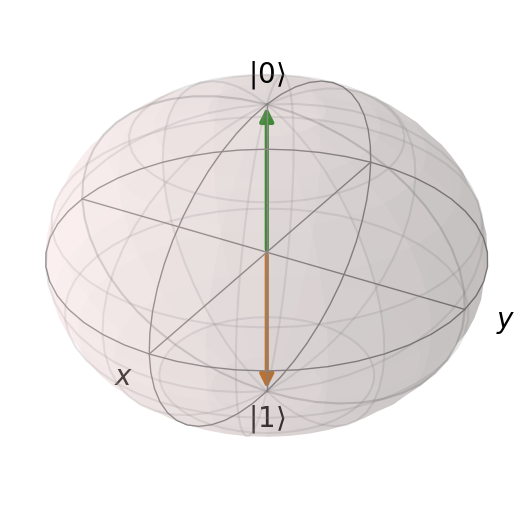

In [17]:
b.add_states(photon_v)
b.show()

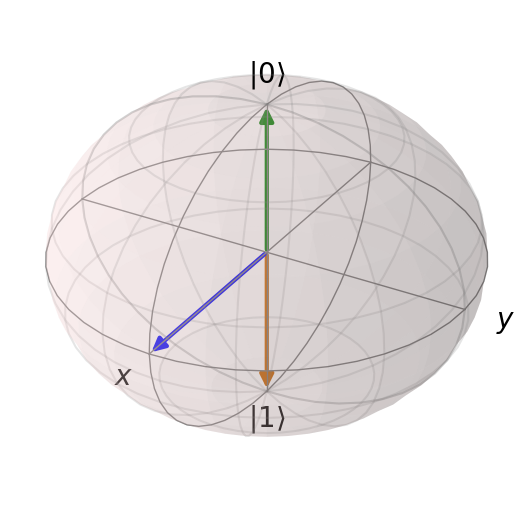

In [18]:
b.add_states(photon_d45)
b.show()

In [19]:
# Define the measurement operators simulating Bob's choice of polarization filters
vertical_filter = qt.Qobj([[0, 0],
                           [0, 1]])        # Bob uses vertically oriented filter for measurement in rectilinear basis

diagonal45_filter = qt.Qobj([[0.5, 0.5],
                             [0.5, 0.5]])  # Bob uses diagonally oriented filter (45 deg) for measurement in diagonal basis

In [20]:
qt.measurement.measure_observable(photon_v, diagonal45_filter)  # example of nondeterministic measurement (rerun the cell)

(0.0,
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[-0.70710678]
  [ 0.70710678]])

In [21]:
# 2) Transmission phase

def pick_photon_polarization(basis, bit_value):
    # Polarization of the photon Alice sends depends on her random sequances
    if basis == RECTILINEAR_BASIS:
        if bit_value == HORIZONTAL_POL:
            photon = photon_h
            sign = "H"
        else:  # bit_value == VERTICAL_POL:
            photon = photon_v
            sign = "V"
            
    else:  # basis == DIAGONAL_BASIS
        if bit_value == DIAGONAL_45_POL:
            photon = photon_d45
            sign = "D45"
        else:  # bit_value == DIAGONAL_135_POL
            photon = photon_d135
            sign = "D135"
            
    return photon, sign

In [22]:
def measure_polarization(photon, basis):
    pol_filter = vertical_filter if basis == RECTILINEAR_BASIS else diagonal45_filter

    passed_filter, photon_out = qt.measurement.measure_observable(photon, pol_filter)
    
    if pol_filter == vertical_filter:
        if passed_filter:
            value = VERTICAL_POL    # if photon passes, it is assumed to have the polarization of the filter
        else:
            value = HORIZONTAL_POL  # if photon doesn't pass, it is assumed to be orthogonal to the filter
            
    else:
        if passed_filter:
            value = DIAGONAL_45_POL
        else:
            value = DIAGONAL_135_POL
            
    return value, photon_out

In [23]:
# Perform transmission

bob_measured_values = []
photons_sent = [] # keep track of the photons Alice sent (for demonstration purposes)

for basis_a, bit_value, basis_b, i in zip(alice_rand_bases_seq, alice_rand_bit_seq, bob_rand_bases_seq, range(m)):
    
    # Alice picks a polarized foton source according to her random sequances
    photon, sign = pick_photon_polarization(basis_a, bit_value)
    photons_sent.append(sign)
            
    # Alice sends the picked photon to Bob
    if eavesdropper_present:
        _, photon = measure_polarization(photon, eve_rand_bases_seq[i])
    
    #Bob measures the photon
    value, _ = measure_polarization(photon, basis_b)
    bob_measured_values.append(int(value))  # append value to the end of Bob's measurements sequence

In [24]:
np.vstack([
          np.array(photons_sent),
          bob_rand_bases_seq,
          np.array(bob_measured_values)
          ]).T[:11, :]

array([['D45', '1', '0'],
       ['H', '1', '1'],
       ['D45', '1', '0'],
       ['D45', '0', '1'],
       ['D45', '1', '0'],
       ['D135', '1', '1'],
       ['D45', '0', '1'],
       ['H', '1', '1'],
       ['D45', '0', '0'],
       ['H', '0', '0'],
       ['D45', '0', '0']], dtype='<U11')

In [25]:
# 3) Elimination phase

# Alice and Bob compare their random bases sequances
bases_disagreement_indices = np.where(alice_rand_bases_seq != bob_rand_bases_seq)[0]

In [26]:
bases_disagreement_indices[:100] # See sample of the indices Bob and ALice will have to remove

array([  1,   3,   6,   7,   8,  10,  15,  16,  18,  19,  23,  25,  26,
        27,  29,  33,  35,  38,  41,  42,  44,  45,  47,  48,  51,  52,
        53,  58,  59,  60,  65,  72,  74,  75,  77,  80,  81,  83,  86,
        89,  91,  95,  96,  98,  99, 101, 103, 104, 105, 107, 109, 111,
       112, 113, 115, 116, 117, 118, 119, 121, 124, 132, 136, 139, 140,
       142], dtype=int64)

In [27]:
# Bob removes elements which he measured in the incorrect base from his measurements sequence
for i in np.flip(bases_disagreement_indices):
    bob_measured_values.pop(i)
    
# ALice removes those elements from her random bit sequence
for i in np.flip(bases_disagreement_indices):
    alice_rand_bit_seq.pop(i)

In [28]:
len(alice_rand_bases_seq)

144

In [29]:
len(bob_rand_bases_seq)

144

In [30]:
len(alice_rand_bit_seq)

78

In [31]:
len(bob_measured_values)

78

In [32]:
# 4) Error check phase

# Bob picks random subset of his measured values sequence, 1/3 of the sequence lenth (after elimination phase) long
error_check_indices = np.random.randint(0, len(bob_measured_values), len(bob_measured_values)//3)

In [33]:
error_check_indices  # Bob makes indices public for Alice to pick the same elements from her sequence

array([22, 52, 29, 32, 10, 52, 13, 51, 70, 65, 53, 22, 67,  8, 77, 45, 10,
       20, 23, 73, 16, 18, 64, 61, 68, 73])

In [34]:
bob_error_check_subset = []
alice_error_check_subset = []

for i in np.flip(np.sort(error_check_indices)):
    bob_el = bob_measured_values.pop(i)
    bob_error_check_subset.append(bob_el)
    
    alice_el = alice_rand_bit_seq.pop(i)
    alice_error_check_subset.append(alice_el)
    

In [35]:
m

144

In [36]:
len(bob_measured_values)  # see that a big part of bits from the original sequence had to be sacrificed,
                          # that's why m was chosen 6 times bigger that n in the begining

52

In [37]:
len(alice_rand_bit_seq)

52

In [38]:
# Compare chosen subsets
sequences_identical = bob_measured_values == alice_rand_bit_seq

In [39]:
sequences_identical

False

In [40]:
if sequences_identical:
    secret_key = alice_rand_bit_seq[:n]  # use first n bits of final sequance as key
    print("Key was safely established.")
    
else:
    raise SystemExit("Eavesdropper was detected! Key couldn't be safely established.")
    # The bellow code is not executed, communication has to be repeated until a safe key is established.

SystemExit: Eavesdropper was detected! Key couldn't be safely established.

C:\Users\lea\anaconda3\envs\new_qkd\lib\site-packages\IPython\core\interactiveshell.py:3449: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
binary_message

In [ ]:
np.array(secret_key)

In [ ]:
def encrypt_message(message, key_seq):
    """ Encrypt message by Vernam cipher
    """
    key = ''.join(map(str, key_seq))
    bin_message = message_to_binary_str(message)
    
    # Perform binary XOR on the message and the key bitwise
    encrypted_bin_seq = [str(int(m) ^ int(k)) for m, k in zip(bin_message, key)]
    
    encrypted_bin_str = ''.join(encrypted_bin_seq)
    encrypted_message = binary_str_to_message(encrypted_bin_str)
    
    return encrypted_message


def decrypt_message(message, key_seq):
    """ Decrypt message encrypted by Vernam cipher
    """
    return encrypt_message(message, key_seq)  # messages are encrypted en decrypted the same way in Vernam binary cipher
    

In [ ]:
# Encrypted messages can be send over classical chanel with unconditional security
encrypted_message = encrypt_message(message, secret_key)

print("The encrypted message is: " + encrypted_message)

In [ ]:
# Bob can decrypt the messages with his copy of the secret key
decrypted_message = decrypt_message(encrypted_message, bob_measured_values[:n])

print("The decrypted message is: " + decrypted_message)